<a href="https://colab.research.google.com/github/gurram46/Customer-Churn-Prediction-Using-Machine-Learning/blob/main/Customer_Churn_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Exploratory Data Analysis (EDA):

In [94]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [97]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [98]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [99]:
data['TotalCharges'].isnull().sum()

11

In [100]:
print(data['TotalCharges'].dtype)
print(data.head())

float64
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contr

# Visualizing Distributions

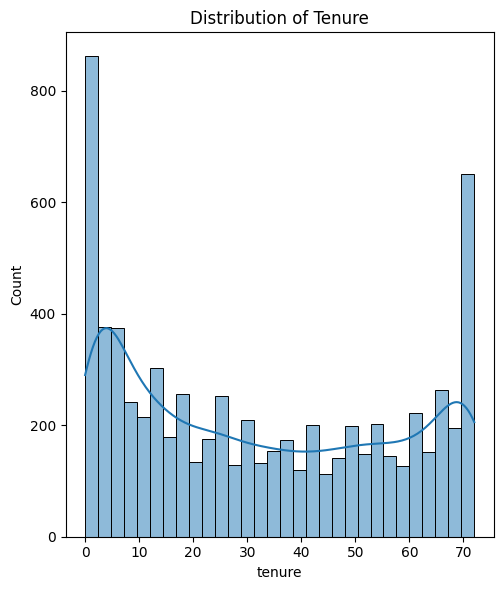

In [101]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.histplot(data['tenure'],kde=True,bins=30)
plt.title('Distribution of Tenure')
plt.tight_layout()
plt.show()

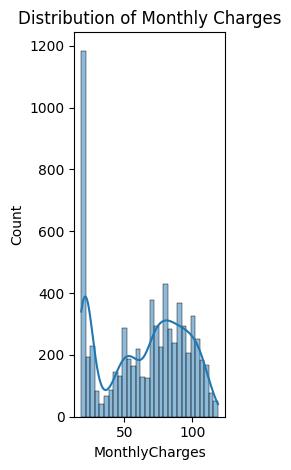

In [102]:
plt.subplot(1,3,2)
sns.histplot(data['MonthlyCharges'],kde=True,bins=30)
plt.title('Distribution of Monthly Charges')
plt.tight_layout()
plt.show()

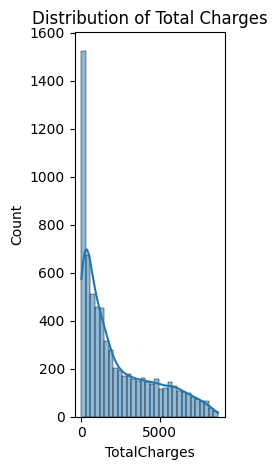

In [103]:
plt.subplot(1,3,3)
sns.histplot(data['TotalCharges'],kde=True,bins=30)
plt.title('Distribution of Total Charges')
plt.tight_layout()
plt.show()

**Boxplot**

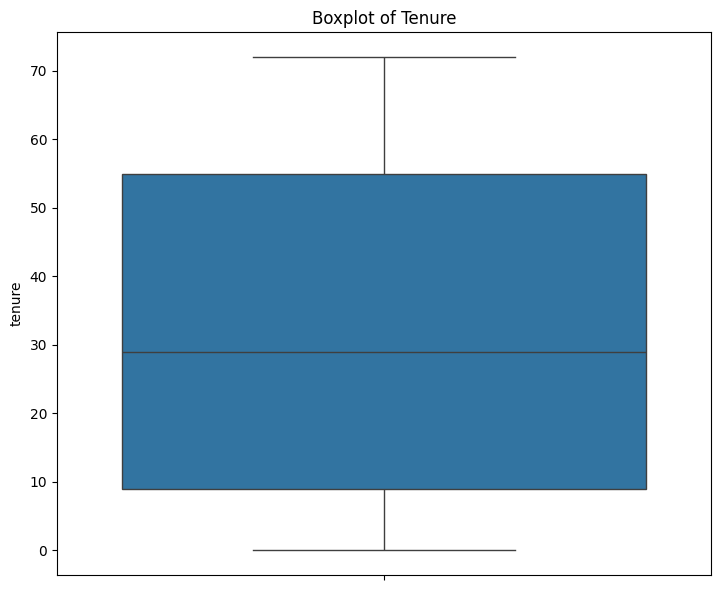

In [104]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y=data['tenure'])
plt.title('Boxplot of Tenure')
plt.tight_layout()
plt.show()

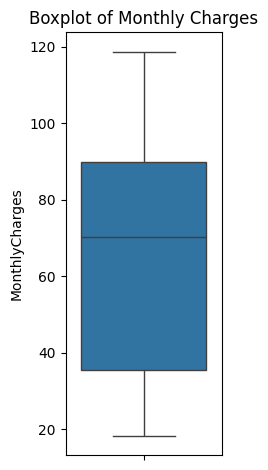

In [105]:
plt.subplot(1,3,2)
sns.boxplot(y=data['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.tight_layout()
plt.show()

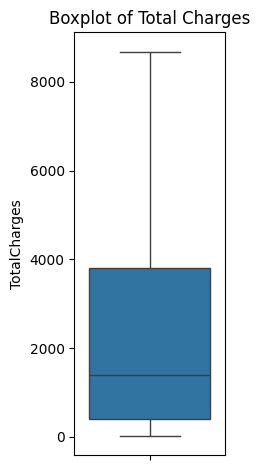

In [106]:
plt.subplot(1,3,3)
sns.boxplot(y=data['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.tight_layout()
plt.show()

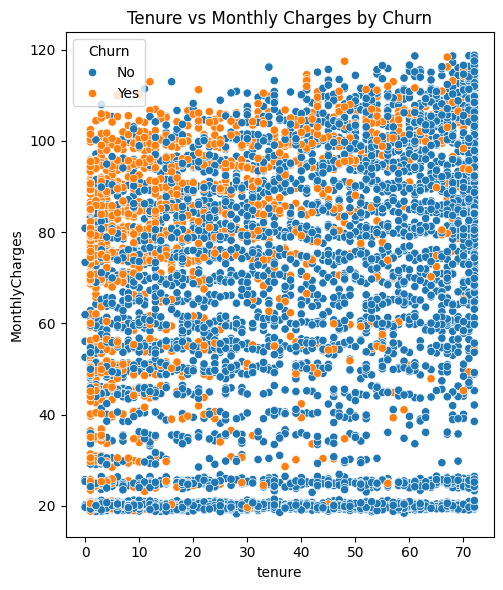

In [107]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Tenure vs Monthly Charges by Churn')
plt.tight_layout()
plt.show()

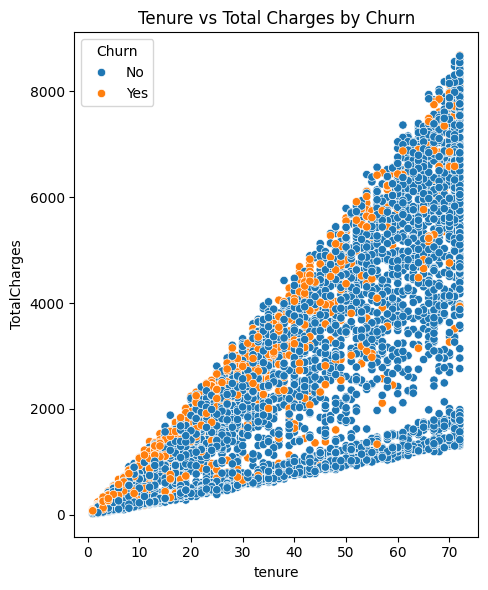

In [108]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=data)
plt.title('Tenure vs Total Charges by Churn')
plt.tight_layout()
plt.show()

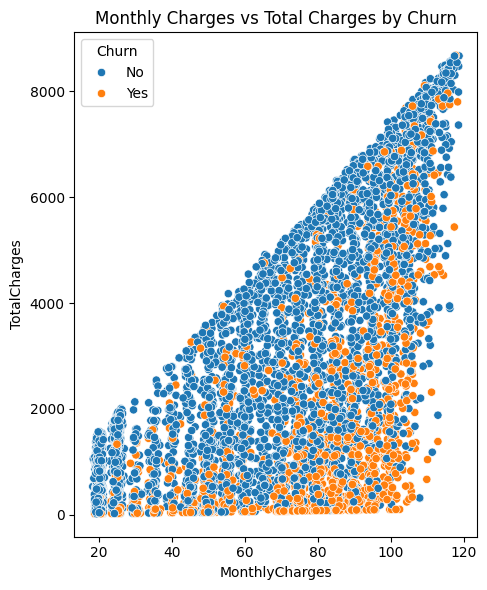

In [109]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title('Monthly Charges vs Total Charges by Churn')
plt.tight_layout()
plt.show()

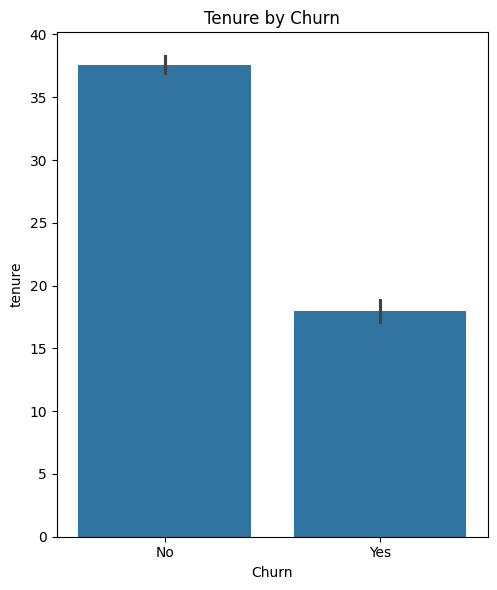

In [110]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Churn', y='tenure', data=data)
plt.title('Tenure by Churn')
plt.tight_layout()
plt.show()

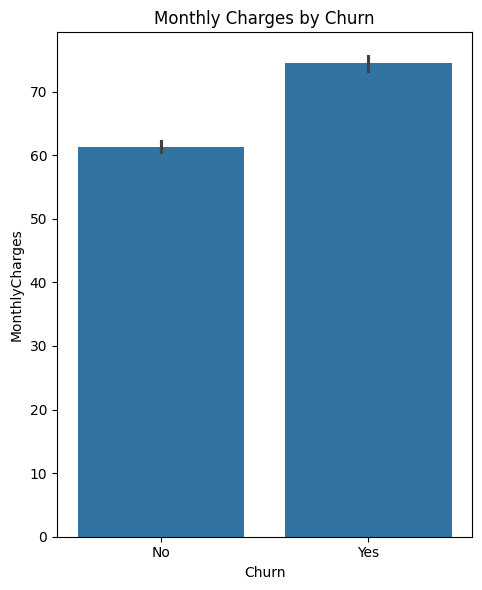

In [111]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 2)
sns.barplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Churn')
plt.tight_layout()
plt.show()

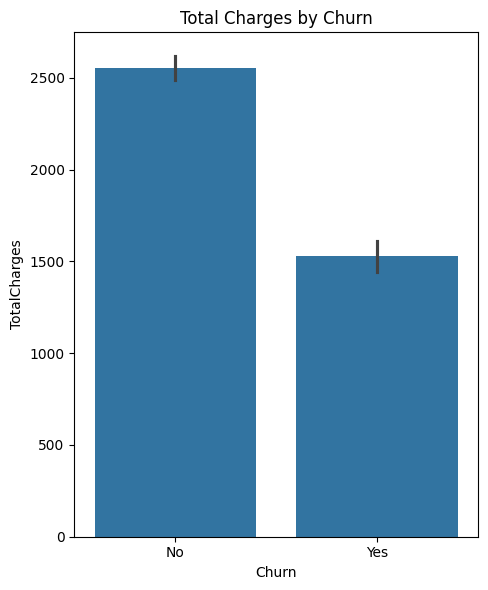

In [112]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 3)
sns.barplot(x='Churn', y='TotalCharges', data=data)
plt.title('Total Charges by Churn')
plt.tight_layout()
plt.show()

# Encode Categorical Variables

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_encoder=LabelEncoder()
data['Churn']=label_encoder.fit_transform(data['Churn'])

In [115]:
data=pd.get_dummies(data,columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [116]:
print(data.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0       1           29.85         29.85      0   
1  5575-GNVDE              0      34           56.95       1889.50      0   
2  3668-QPYBK              0       2           53.85        108.15      1   
3  7795-CFOCW              0      45           42.30       1840.75      0   
4  9237-HQITU              0       2           70.70        151.65      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1     

# Split Data

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x=data.drop(columns=['customerID','Churn'])
y=data['Churn']

In [119]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
print("Traning set shape:",X_train.shape)
print("Testing set shape:",X_test.shape)

Traning set shape: (5634, 30)
Testing set shape: (1409, 30)


# Impute Missing

In [121]:
from sklearn.impute import SimpleImputer

In [122]:
num_imputer=SimpleImputer(strategy='median')
cat_imputer=SimpleImputer(strategy='most_frequent')

In [123]:
num_cols=X_train.select_dtypes(include=[np.number]).columns
cat_cols=X_train.select_dtypes(exclude=[np.number]).columns

In [124]:
X_train[num_cols]=num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [125]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


# Model Bulding

**Logistic Regression**

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score,precision_score

In [127]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [128]:
y_pred_lr=lr_model.predict(X_test)

In [129]:
acc_lr=accuracy_score(y_test,y_pred_lr)
prec_lr=precision_score(y_test,y_pred_lr)
rec_lr=recall_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)

In [130]:
print("Accuracy:",acc_lr)
print("Precision:",prec_lr)
print("Recall:",rec_lr)
print("F1 Score:",f1_lr)

Accuracy: 0.8211497515968772
Precision: 0.6850152905198776
Recall: 0.6005361930294906
F1 Score: 0.64


**Random Forest**

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

In [133]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [134]:
y_pred_rf=rf_model.predict(X_test)

In [135]:
acc_rf=accuracy_score(y_test,y_pred_rf)
prec_rf=precision_score(y_test,y_pred_rf)
rec_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)

In [136]:
print("Accuracy:",acc_rf)
print("Precision:",prec_rf)
print("Recall:",rec_rf)
print("F1 Score:",f1_rf)

Accuracy: 0.7892122072391767
Precision: 0.6439393939393939
Recall: 0.45576407506702415
F1 Score: 0.533751962323391


**XGBoost**

In [140]:
import xgboost as xgb

In [141]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [142]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [143]:
bst = xgb.train(params, dtrain, num_boost_round=100)

In [144]:
y_pred_proba = bst.predict(dtest)
y_pred_xgb = (y_pred_proba > 0.5).astype(int)

In [145]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [146]:
print("XGBoost (native):")
print(f"Accuracy: {acc_xgb}")
print(f"Precision: {prec_xgb}")
print(f"Recall: {rec_xgb}")
print(f"F1 Score: {f1_xgb}")

XGBoost (native):
Accuracy: 0.7927608232789212
Precision: 0.6345514950166113
Recall: 0.5120643431635389
F1 Score: 0.5667655786350149


**LGBM**

In [52]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [53]:
lgbm_model=LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=31,
    boosting_type='gbdt',
    objective='binary',
)

In [54]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


LGBMClassifier(learning_rate=0.05, objective='binary')

In [55]:
y_pred_lgbm=lgbm_model.predict(X_test)

In [56]:
acc_lgbm=accuracy_score(y_test,y_pred_lgbm)
prec_lgbm=precision_score(y_test,y_pred_lgbm)
rec_lgbm=recall_score(y_test,y_pred_lgbm)
f1_lgbm=f1_score(y_test,y_pred_lgbm)

In [57]:
print("Accuracy:",acc_lgbm)
print("Precision:",prec_lgbm)
print("Recall:",rec_lgbm)
print("F1 Score:",f1_lgbm)

Accuracy: 0.8090844570617459
Precision: 0.6830985915492958
Recall: 0.5201072386058981
F1 Score: 0.5905631659056316


In [58]:
print("Logistic Regression:")
print("Accuracy:",acc_lr)
print("Precision:",prec_lr)
print("Recall:",rec_lr)
print("F1 Score:",f1_lr)
print("-------------------------------------------------------------------")
print("Random Forest:")
print("Accuracy:",acc_rf)
print("Precision:",prec_rf)
print("Recall:",rec_rf)
print("F1 Score:",f1_rf)
print("-------------------------------------------------------------------")
print("XGBoost:")
print("Accuracy:",acc_xgb)
print("Precision:",prec_xgb)
print("Recall:",rec_xgb)
print("---------------------------------------------------------------------")
print("LGBM:")
print("Accuracy:",acc_lgbm)
print("Precision:",prec_lgbm)
print("Recall:",rec_lgbm)
print("F1 Score:",f1_lgbm)

Logistic Regression:
Accuracy: 0.8211497515968772
Precision: 0.6850152905198776
Recall: 0.6005361930294906
F1 Score: 0.64
-------------------------------------------------------------------
Random Forest:
Accuracy: 0.7892122072391767
Precision: 0.6439393939393939
Recall: 0.45576407506702415
F1 Score: 0.533751962323391
-------------------------------------------------------------------
XGBoost:
Accuracy: 0.7927608232789212
Precision: 0.6345514950166113
Recall: 0.5120643431635389
---------------------------------------------------------------------
LGBM:
Accuracy: 0.8090844570617459
Precision: 0.6830985915492958
Recall: 0.5201072386058981
F1 Score: 0.5905631659056316


# Hyperparameter Tuning

**Logistic Regression**

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid_lr={
    'C':[0.1,1,10,100],
    'solver':['liblinear','saga'],
    'max_iter':[100,200,300]
}

In [61]:
lr=LogisticRegression()

In [62]:
grid_search_lr=GridSearchCV(estimator=lr,param_grid=param_grid_lr,scoring='f1',cv=5,verbose=1)

In [63]:
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [64]:
best_param_lr=grid_search_lr.best_params_
best_score_lr=grid_search_lr.best_score_

In [65]:
print("Best Parameters:",best_param_lr)
print("Best Score:",best_score_lr)

Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best Score: 0.5902942666089321


In [66]:
best_lr_model=grid_search_lr.best_estimator_
y_pred_best_lr=best_lr_model.predict(X_test)

In [67]:
acc_best_lr=accuracy_score(y_test,y_pred_best_lr)
prec_best_lr=precision_score(y_test,y_pred_best_lr)
rec_best_lr=recall_score(y_test,y_pred_best_lr)
f1_best_lr=f1_score(y_test,y_pred_best_lr)

In [68]:
print("Accuracy:",acc_best_lr)
print("Precision:",prec_best_lr)
print("Recall:",rec_best_lr)
print("F1 Score:",f1_best_lr)

Accuracy: 0.8211497515968772
Precision: 0.6983606557377049
Recall: 0.5710455764075067
F1 Score: 0.6283185840707964


**Random Forest**

In [69]:
param_dist_rf = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [70]:
rf=RandomForestClassifier(random_state=42)

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=50, scoring='f1', cv=5, verbose=1, random_state=42)

In [74]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300])},
                   random_state=42, scoring='f1', verbose=1)

In [75]:
best_params_rf=random_search_rf.best_params_
best_score_rf=random_search_rf.best_score_

In [76]:
print("Best Parameters:",best_params_rf)
print("Best Score:",best_score_rf)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
Best Score: 0.5760401430356783


In [77]:
best_rf_model=random_search_rf.best_estimator_
y_pred_best_rf=best_rf_model.predict(X_test)

In [78]:
acc_best_rf=accuracy_score(y_test,y_pred_best_rf)
prec_best_rf=precision_score(y_test,y_pred_best_rf)
rec_best_rf=recall_score(y_test,y_pred_best_rf)
f1_best_rf=f1_score(y_test,y_pred_best_rf)

In [79]:
print("Accuracy:",acc_best_rf)
print("Precision:",prec_best_rf)
print("Recall:",rec_best_rf)
print("F1 Score:",f1_best_rf)

Accuracy: 0.8097941802696949
Precision: 0.6923076923076923
Recall: 0.5067024128686327
F1 Score: 0.5851393188854489


**XGBoost**

In [148]:
param_dist_xgb = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [150]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [151]:
bst = xgb.train(param_dist_xgb, dtrain, num_boost_round=100)

In [152]:
y_pred_proba = bst.predict(dtest)
y_pred_xgb = (y_pred_proba > 0.5).astype(int)

In [153]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [154]:
print("XGBoost (native):")
print(f"Accuracy: {acc_xgb}")
print(f"Precision: {prec_xgb}")
print(f"Recall: {rec_xgb}")
print(f"F1 Score: {f1_xgb}")

XGBoost (native):
Accuracy: 0.8048261178140526
Precision: 0.6560509554140127
Recall: 0.5522788203753352
F1 Score: 0.5997088791848617


**LightGBM**

In [155]:
param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart'],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.7, 0.8, 0.9, 1.0]
    }

In [156]:
lgbm=LGBMClassifier(objective='binary',metric='binary_logloss')

In [157]:
random_search_lgbm=RandomizedSearchCV(estimator=lgbm,param_distributions=param_dist_lgbm,n_iter=50,scoring='f1',cv=5,verbose=1,random_state=42)

In [158]:
random_search_lgbm.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='binary_logloss',
                                            objective='binary'),
                   n_iter=50,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'min_child_samples': [20, 30, 40],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [159]:
best_params_lgbm=random_search_lgbm.best_params_
best_score_lgbm=random_search_lgbm.best_score_

In [160]:
print("Best Parameters:",best_params_lgbm)
print("Best Score:",best_score_lgbm)

Best Parameters: {'subsample': 0.9, 'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 40, 'learning_rate': 0.05, 'boosting_type': 'dart'}
Best Score: 0.5707297236142047


In [161]:
best_lgbm_model = random_search_lgbm.best_estimator_
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

In [162]:
acc_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
prec_best_lgbm = precision_score(y_test, y_pred_best_lgbm)
rec_best_lgbm = recall_score(y_test, y_pred_best_lgbm)
f1_best_lgbm = f1_score(y_test, y_pred_best_lgbm)

In [163]:
print("Accuracy:", acc_best_lgbm)
print("Precision:", prec_best_lgbm)
print("Recall:", rec_best_lgbm)
print("F1 Score:", f1_best_lgbm)

Accuracy: 0.8055358410220014
Precision: 0.6724738675958188
Recall: 0.517426273458445
F1 Score: 0.5848484848484848


# ROC Curve for Each Model

In [164]:
from sklearn.metrics import roc_curve, roc_auc_score

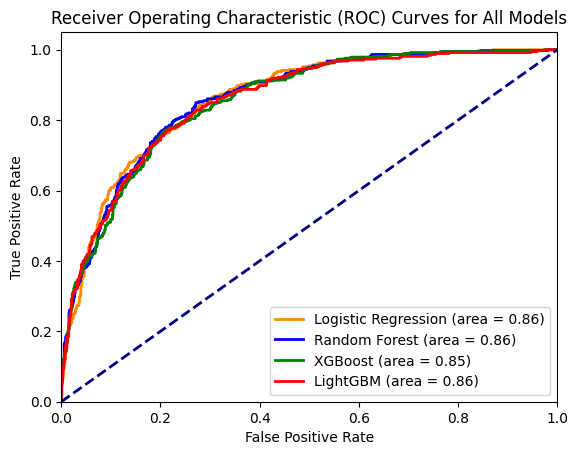

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()


fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)


fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)

dtest = xgb.DMatrix(X_test)
y_pred_proba_xgb = bst.predict(dtest)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)


fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, best_lgbm_model.predict_proba(X_test)[:, 1])
roc_auc_lgbm = roc_auc_score(y_test, best_lgbm_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_lgbm, tpr_lgbm, color='red', lw=2, label='LightGBM (area = %0.2f)' % roc_auc_lgbm)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models')
plt.legend(loc="lower right")

# Show plot
plt.show()


# Predicting The data from the best model

In [167]:
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)

results_lr = pd.DataFrame({
    'CustomerID': X_test.index,
    'Actual Churn': y_test,
    'Predicted Churn': y_pred_best_lr
})

results_lr.to_csv('submission.csv', index=False)
print("submission.csv file created successfully!")


submission.csv file created successfully!


In [168]:
print(results_lr.head(100))

      CustomerID  Actual Churn  Predicted Churn
185          185             1                1
2715        2715             0                0
3825        3825             0                0
1807        1807             1                1
132          132             0                0
...          ...           ...              ...
1379        1379             0                0
734          734             0                0
3802        3802             0                0
2167        2167             1                1
4714        4714             0                0

[100 rows x 3 columns]
